In [1]:
import numpy as np
import matplotlib.pyplot as plt

LDA for face expression recognition

In [2]:
# load the data (the files 'faces.npy' and 'face_expressions.npy')
X = np.load('faces.npy')
y = np.load('face_expressions.npy')

In [3]:
X.shape

(165, 4800)

Each row of the matrix X is a 60x80 pixels grayscale image. 

(-0.5, 79.5, 59.5, -0.5)

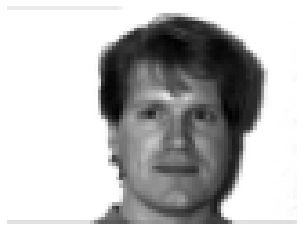

In [4]:
plt.imshow(X[0].reshape(60,80),cmap='gray')
plt.axis(False)

There are 165 grayscale images of 15 individuals. There are 11 images per subject, one per different facial expression or configuration: center-light, w/glasses, happy, left-light, w/no glasses, normal, right-light, sad, sleepy, surprised, and wink.

In [5]:
y

array(['centerlight', 'glasses', 'happy', 'leftlight', 'noglasses',
       'normal', 'rightlight', 'sad', 'sleepy', 'surprised', 'wink',
       'centerlight', 'glasses', 'happy', 'leftlight', 'noglasses',
       'normal', 'rightlight', 'sad', 'sleepy', 'surprised', 'wink',
       'centerlight', 'glasses', 'happy', 'leftlight', 'noglasses',
       'normal', 'rightlight', 'sad', 'sleepy', 'surprised', 'wink',
       'centerlight', 'glasses', 'happy', 'leftlight', 'noglasses',
       'normal', 'rightlight', 'sad', 'sleepy', 'surprised', 'wink',
       'centerlight', 'glasses', 'happy', 'leftlight', 'noglasses',
       'normal', 'rightlight', 'sad', 'sleepy', 'surprised', 'wink',
       'centerlight', 'glasses', 'happy', 'leftlight', 'noglasses',
       'normal', 'rightlight', 'sad', 'sleepy', 'surprised', 'wink',
       'centerlight', 'glasses', 'happy', 'leftlight', 'noglasses',
       'normal', 'rightlight', 'sad', 'sleepy', 'surprised', 'wink',
       'centerlight', 'glasses', 'happy',

------------------
   INDIVIDUAL 0
------------------


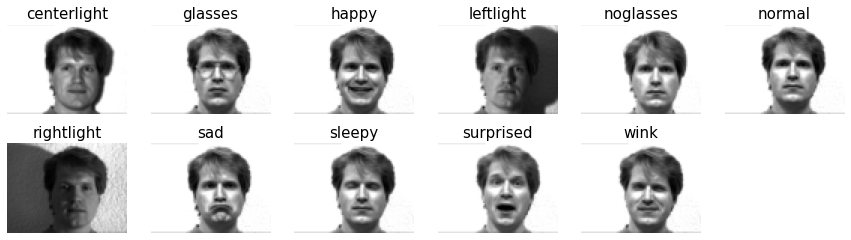

------------------
   INDIVIDUAL 1
------------------


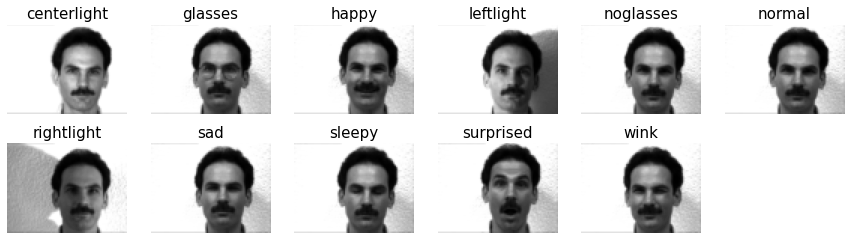

------------------
   INDIVIDUAL 2
------------------


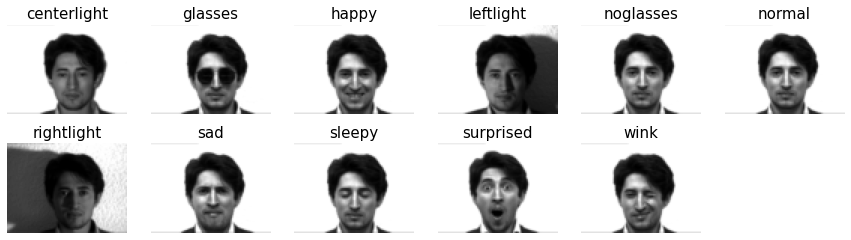

------------------
   INDIVIDUAL 3
------------------


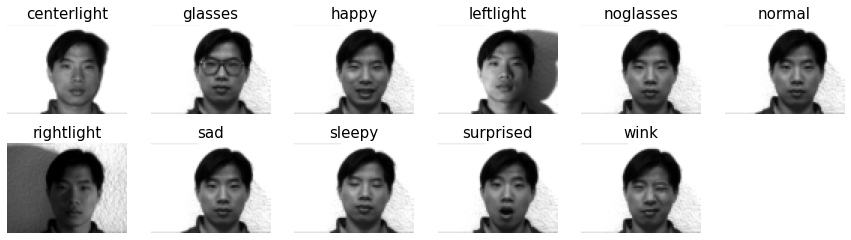

------------------
   INDIVIDUAL 4
------------------


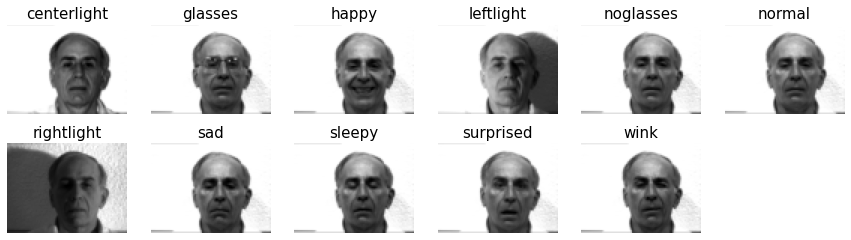

------------------
   INDIVIDUAL 5
------------------


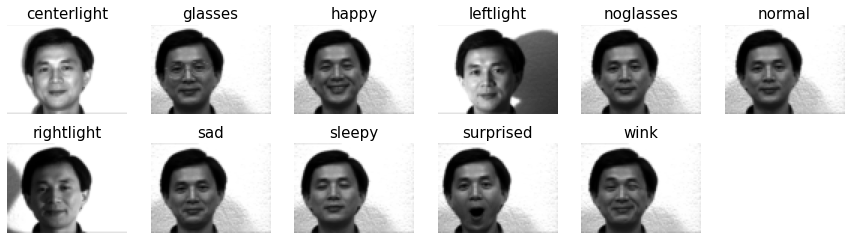

------------------
   INDIVIDUAL 6
------------------


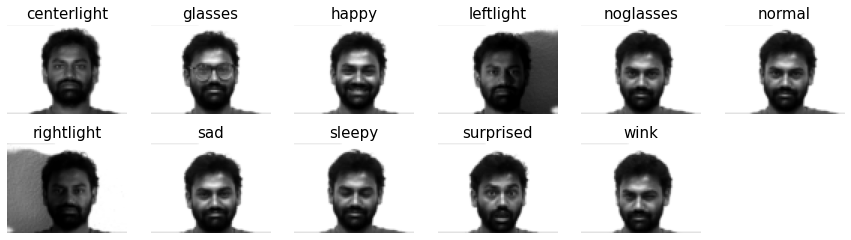

------------------
   INDIVIDUAL 7
------------------


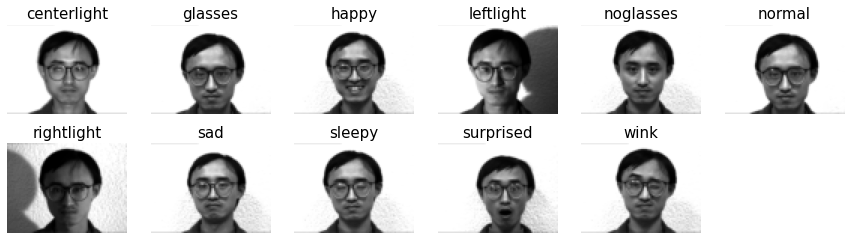

------------------
   INDIVIDUAL 8
------------------


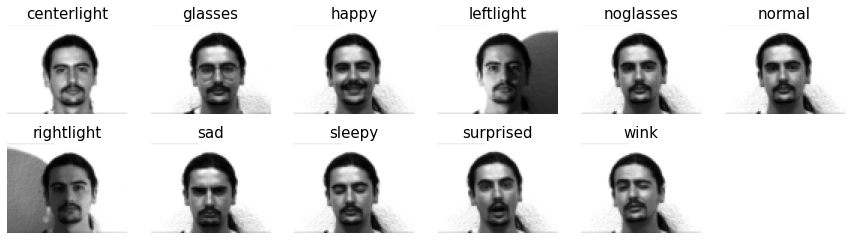

------------------
   INDIVIDUAL 9
------------------


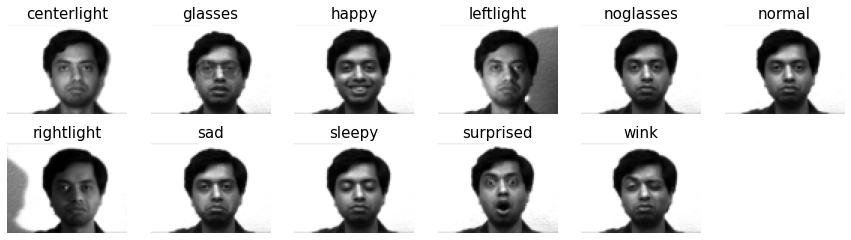

------------------
   INDIVIDUAL 10
------------------


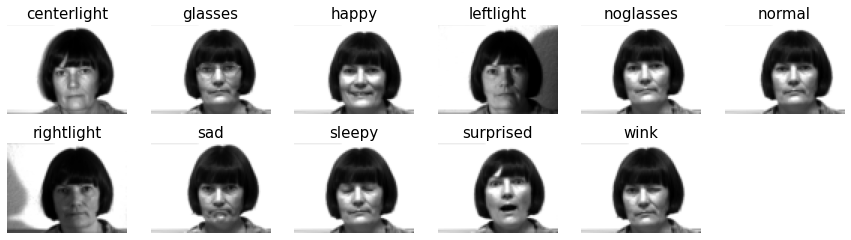

------------------
   INDIVIDUAL 11
------------------


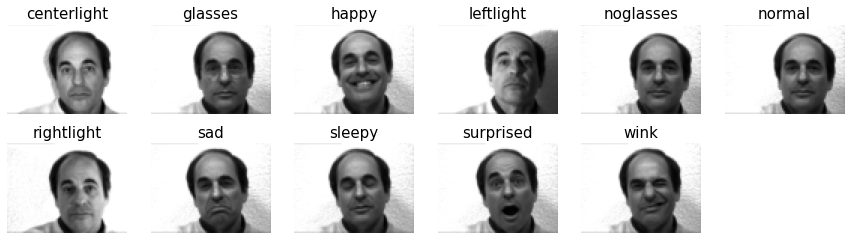

------------------
   INDIVIDUAL 12
------------------


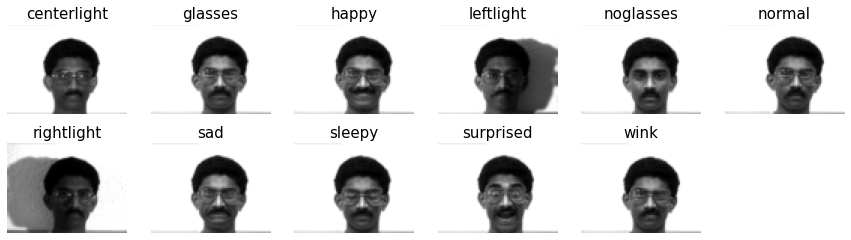

------------------
   INDIVIDUAL 13
------------------


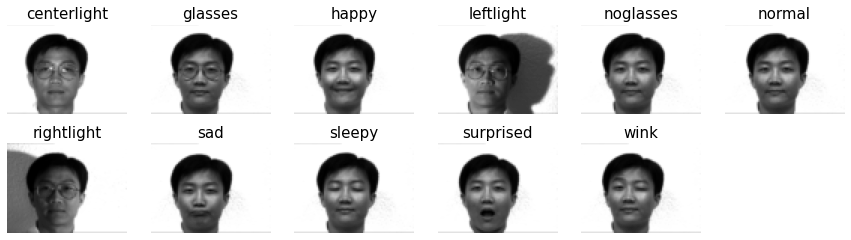

------------------
   INDIVIDUAL 14
------------------


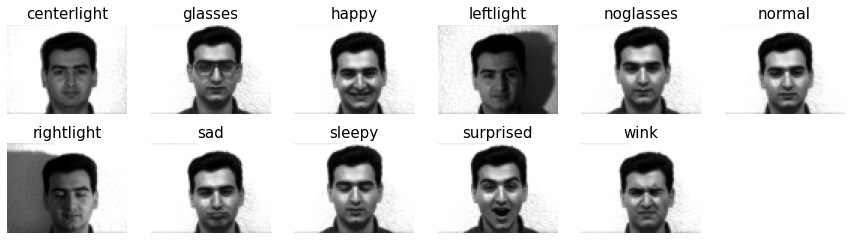

In [6]:
expressions = ['centerlight','glasses','happy','leftlight','noglasses','normal','rightlight','sad','sleepy','surprised','wink']
for individual in range(15):
    print('------------------')
    print('   INDIVIDUAL '+str(individual))
    print('------------------')
    plt.figure(figsize=(15,4))
    for j in range(11):
        face = X[11*individual+j].reshape(60,80)
        plt.subplot(2, 6,j+1)
        plt.imshow(face,cmap='gray')
        plt.axis('off')
        plt.title(y[11*individual+j], fontsize=15)
    plt.show()

We are going to use Linear Discriminant Analysis (LDA) to find the 2-dimensional subspace (plane) consisting of the directions which maximize the separation between classes.
Rather than using my `lda` function, we are going to use [scikit-learn](https://scikit-learn.org/stable/index.html) [`LinearDiscriminantAnalysis`](https://scikit-learn.org/stable/modules/lda_qda.html#lda-qda) function.

In [7]:
# import the Linear Discriminant Analysis function from sci-kit learn
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
# instantiate the function
lda = LinearDiscriminantAnalysis(n_components=2)
# project the data onto R2
lda.fit_transform(X,y)

array([[  5.0455218 ,   2.46300486],
       [  8.7420168 ,   8.46816854],
       [  5.13433113,  -1.89571625],
       [-52.66384912,   4.55734173],
       [  0.44963479,  -3.99246583],
       [  1.68064634,  -3.03199362],
       [ 13.22673055,  21.01412843],
       [  5.40692464, -11.40073868],
       [  3.69309897,  -6.39527577],
       [  4.90923285,  -5.4566069 ],
       [  3.37241709,  -3.54713172],
       [  5.30137335,   3.27933145],
       [  7.31617326,   8.72675335],
       [  2.20664913,  -1.30894603],
       [-50.83805681,   4.26741497],
       [  2.90452785,  -4.46420986],
       [  2.90452785,  -4.46420986],
       [ 14.17089311,  20.60353108],
       [  6.00027899, -11.45238282],
       [  1.56151721,  -5.59223132],
       [  3.98373603,  -5.50814084],
       [  4.54762651,  -3.97164365],
       [  5.36508349,   2.30748082],
       [  9.03198317,   8.2998535 ],
       [  4.36549328,  -1.6195494 ],
       [-53.96561903,   5.17240883],
       [  1.71267797,  -3.98360161],
 

In [33]:
v=lda.fit_transform(X,y).T

Plot the projected data points. Color each point according to its class (face expression).

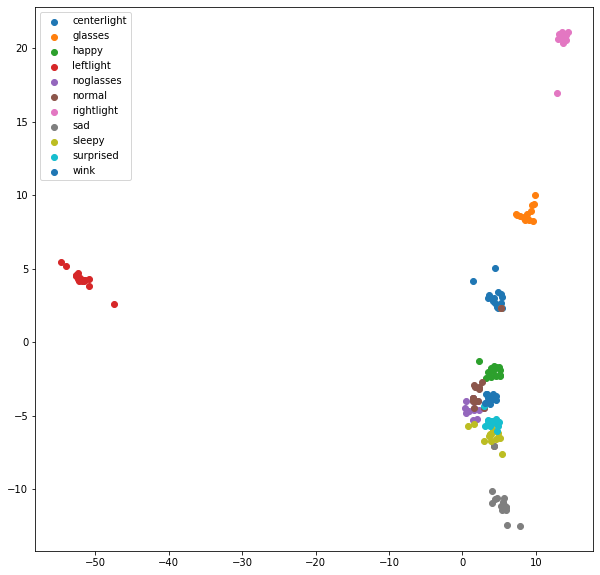

In [34]:
# plot projected points
plt.figure(figsize=(10,10))
faces = np.unique(y)
for i in range(len(faces)):
    plt.scatter(v[0,y==faces[i]],v[1,y==faces[i]], label=faces[i])
plt.legend(fontsize=10)
